# Logistic Regression for binary classification in keras-example-3-image-data

### Test data also included

In [1]:
import os

import numpy as np

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## import tensorflow and keras

In [2]:
import tensorflow as tf

import keras

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split

print ('keras_version: ', keras.__version__)
print ('tensorflow_version: ', tf.__version__)


Using TensorFlow backend.


keras_version:  2.2.2
tensorflow_version:  1.4.0


## Define path and necessary parameters

In [3]:
PATH = os.getcwd()
# Define data path
train_data_path = os.path.join(PATH ,'data_2_class','train')
test_data_path = os.path.join(PATH ,'data_2_class','test')
# Read out the folders or data classes
train_data_dir_list = os.listdir(train_data_path)
test_data_dir_list = os.listdir(test_data_path)
print ('data_list: ', test_data_dir_list)
num_classes=2
# Assign Labels to the datset
labels={'cats':0,'dogs':1}
num_rows=32
num_cols=32

num_epoch=100
batch_size=32


data_list:  ['cats', 'dogs']


## Load the train files and assign labels to each file

In [4]:
# the list to store the name and label of files
train_data_files = []
train_data_labels = []

# Loop over each class and read the train files and store it in list declared above
for data_dir in train_data_dir_list:
    label=labels[data_dir]
    print ('Loading the files of dataset-'+'{}\n'.format(data_dir))
    files=os.listdir(os.path.join(train_data_path,data_dir))
    #print (files)
    for file in files:
        f_name = os.path.join(data_dir,file)
        train_data_files.append(f_name)
        train_data_labels.append(label)

num_train_samples = len(train_data_files)
print ('num of train samples:',num_train_samples)

#Shuffle the dataset
#data_files,data_labels = shuffle(data_files,data_labels, random_state=2)

Loading the files of dataset-cats

Loading the files of dataset-dogs

num of train samples: 200


In [5]:
print ('cat_data: ',train_data_files[0:10])
print ('cat_label:', train_data_labels[0:10])

print ('dog_data: ',train_data_files[100:110])
print ('dog_label:', train_data_labels[100:110])

cat_data:  ['cats\\cat.1.jpg', 'cats\\cat.10.jpg', 'cats\\cat.100.jpg', 'cats\\cat.11.jpg', 'cats\\cat.12.jpg', 'cats\\cat.13.jpg', 'cats\\cat.14.jpg', 'cats\\cat.15.jpg', 'cats\\cat.16.jpg', 'cats\\cat.17.jpg']
cat_label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dog_data:  ['dogs\\dog.1.jpg', 'dogs\\dog.10.jpg', 'dogs\\dog.100.jpg', 'dogs\\dog.11.jpg', 'dogs\\dog.12.jpg', 'dogs\\dog.13.jpg', 'dogs\\dog.14.jpg', 'dogs\\dog.15.jpg', 'dogs\\dog.16.jpg', 'dogs\\dog.17.jpg']
dog_label: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Load the test files and assign labels to each file

In [6]:
# the list to store the name and label of files
test_data_files = []
test_data_labels = []

# Loop over each class and read the train files and store it in list declared above
for data_dir in test_data_dir_list:
    label=labels[data_dir]
    print ('Loading the files of dataset-'+'{}\n'.format(data_dir))
    files=os.listdir(os.path.join(test_data_path,data_dir))
    #print (files)
    for file in files:
        f_name = os.path.join(data_dir,file)
        test_data_files.append(f_name)
        test_data_labels.append(label)

num_test_samples = len(test_data_files)
print ('num of test samples:',num_test_samples)

Loading the files of dataset-cats

Loading the files of dataset-dogs

num of test samples: 40


In [7]:
print ('cat_data: ',test_data_files[0:10])
print ('cat_label:', test_data_labels[0:10])

print ('dog_data: ',test_data_files[20:30])
print ('dog_label:', test_data_labels[20:30])

cat_data:  ['cats\\cat.10.jpg', 'cats\\cat.12.jpg', 'cats\\cat.20.jpg', 'cats\\cat.21.jpg', 'cats\\cat.22.jpg', 'cats\\cat.23.jpg', 'cats\\cat.49.jpg', 'cats\\cat.50.jpg', 'cats\\cat.60.jpg', 'cats\\cat.61.jpg']
cat_label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dog_data:  ['dogs\\dog.10.jpg', 'dogs\\dog.13.jpg', 'dogs\\dog.14.jpg', 'dogs\\dog.18.jpg', 'dogs\\dog.2.jpg', 'dogs\\dog.20.jpg', 'dogs\\dog.23.jpg', 'dogs\\dog.24.jpg', 'dogs\\dog.4.jpg', 'dogs\\dog.48.jpg']
dog_label: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Define a function to read the loaded file names

In [8]:
# define the function to read the test data
def read_data(data_category='train'):
    x=[]
    y=[]
    if data_category == 'train':
        data_path = train_data_path
        data_files = train_data_files
        data_labels = train_data_labels
        
    elif data_category == 'test':
        data_path = test_data_path
        data_files = test_data_files
        data_labels = test_data_labels
        
    for file_name,lab in zip(data_files,data_labels):
        #print ('file_read: ', data_path+'\\'+fil)
        img_name = os.path.join(data_path,file_name)
        img = cv2.imread(img_name)
        img=cv2.resize(img,(num_rows,num_cols))
        #cv2.imshow('img',img)
        #cv2.waitKey(1)
        x.append(img)
        y.append(lab)
    return x,y

In [9]:
#read the train data
train_data_x,train_data_y = read_data(data_category='train')
train_data_x,train_data_y=np.array(train_data_x),np.array(train_data_y)
m_train = train_data_x.shape[0]
img_size = train_data_x[0].shape
print ("Number of training examples: m_train = " + str(m_train))
print ("Each image is of size:", img_size)
print ("train_set_x shape: " + str(train_data_x.shape))
print ("Label shape: " + str(train_data_y.shape))

Number of training examples: m_train = 200
Each image is of size: (32, 32, 3)
train_set_x shape: (200, 32, 32, 3)
Label shape: (200,)


## Read the test data from loaded file name

In [10]:
#read the test data
test_data_x,test_data_y = read_data(data_category='test')
test_data_x,test_data_y=np.array(test_data_x),np.array(test_data_y)
m_test = test_data_x.shape[0]
img_size = test_data_x[0].shape
print ("Number of test examples: m_test = " + str(m_test))
print ("Each image is of size:", img_size)
print ("test_set_x shape: " + str(test_data_x.shape))
print ("Label shape: " + str(test_data_y.shape))

Number of test examples: m_test = 40
Each image is of size: (32, 32, 3)
test_set_x shape: (40, 32, 32, 3)
Label shape: (40,)


(32, 32, 3)


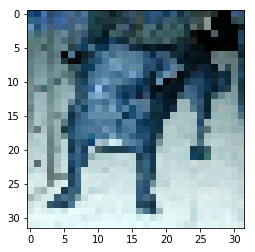

In [11]:
index = 100
print (train_data_x[index].shape)
plt.imshow(train_data_x[index])

## Reshape the data to feed into logistic regression

In [12]:
# Reshape the training and test examples
train_data_x_flatten = train_data_x.reshape(train_data_x.shape[0], -1)
test_data_x_flatten = test_data_x.reshape(test_data_x.shape[0], -1)

print ("train_data_x_flatten shape: " + str(train_data_x_flatten.shape))
print ("train_data_y shape: " + str(train_data_y.shape))
print ("test_data_x_flatten shape: " + str(test_data_x_flatten.shape))
print ("test_data_y shape: " + str(test_data_y.shape))

print ('feature size of each input: ', train_data_x_flatten.shape[1])


train_data_x_flatten shape: (200, 3072)
train_data_y shape: (200,)
test_data_x_flatten shape: (40, 3072)
test_data_y shape: (40,)
feature size of each input:  3072


## Define the logistic Regression model

In [13]:
input_size = train_data_x_flatten.shape[1]
model = Sequential()
model.add(Dense(1, input_dim=input_size, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data_x_flatten,train_data_y,batch_size=batch_size, validation_data=(test_data_x_flatten,test_data_y),epochs=num_epoch)


Train on 200 samples, validate on 40 samples
Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 8.2824 - acc: 0.4850 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/100
200/200 [==============================] - 0s 624us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/100
200/200 [==============================] - 0s 390us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/100
200/200 [==============================] - 0s 234us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/100


200/200 [==============================] - 0s 78us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 61/100
200/200 [==============================] - 0s 78us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 62/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 63/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 64/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 65/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 66/100
200/200 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 67/100
200/200 [==============================] - 0s 156u

## Plot the loss and accuracy curve

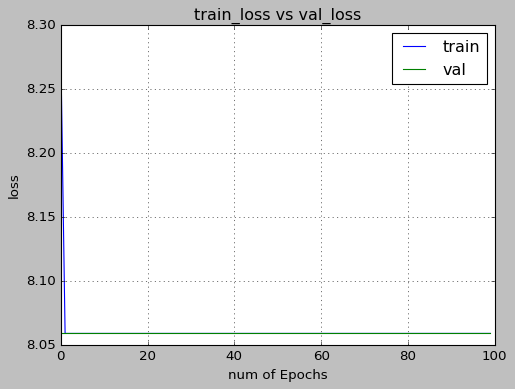

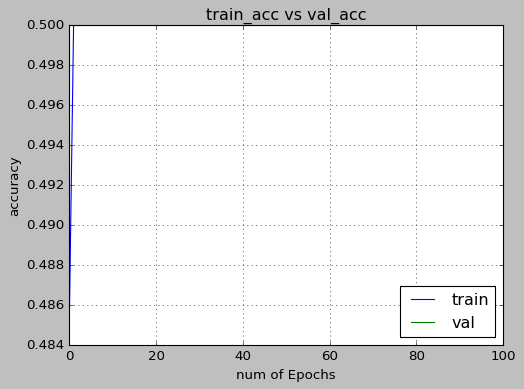

In [15]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('loss_curve_ex-3')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# to save figure
plt.savefig('acc_curve_ex-3')

## Normalizing the data and training the model again

In [16]:
train_data_x_flatten = train_data_x_flatten/255.
test_data_x_flatten = test_data_x_flatten/255.

In [17]:
model = Sequential()
model.add(Dense(1, input_dim=input_size, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data_x_flatten,train_data_y,batch_size=batch_size, validation_data=(test_data_x_flatten,test_data_y),epochs=num_epoch)


Train on 200 samples, validate on 40 samples
Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 0.8018 - acc: 0.4500 - val_loss: 0.7899 - val_acc: 0.5000
Epoch 2/100
200/200 [==============================] - 0s 234us/step - loss: 0.7263 - acc: 0.5300 - val_loss: 0.6824 - val_acc: 0.5250
Epoch 3/100
200/200 [==============================] - 0s 234us/step - loss: 0.6783 - acc: 0.5700 - val_loss: 0.6870 - val_acc: 0.5500
Epoch 4/100
200/200 [==============================] - 0s 234us/step - loss: 0.6648 - acc: 0.5700 - val_loss: 0.6583 - val_acc: 0.5250
Epoch 5/100
200/200 [==============================] - 0s 156us/step - loss: 0.6972 - acc: 0.5750 - val_loss: 0.6823 - val_acc: 0.5750
Epoch 6/100
200/200 [==============================] - 0s 156us/step - loss: 0.7118 - acc: 0.5200 - val_loss: 0.6329 - val_acc: 0.5750
Epoch 7/100
200/200 [==============================] - 0s 156us/step - loss: 0.6668 - acc: 0.5550 - val_loss: 0.6270 - val_acc: 0.6750
Epoch 8/100


Epoch 61/100
200/200 [==============================] - 0s 156us/step - loss: 0.3904 - acc: 0.9050 - val_loss: 0.3897 - val_acc: 0.8750
Epoch 62/100
200/200 [==============================] - 0s 156us/step - loss: 0.3833 - acc: 0.9200 - val_loss: 0.3710 - val_acc: 0.9250
Epoch 63/100
200/200 [==============================] - 0s 156us/step - loss: 0.3790 - acc: 0.9150 - val_loss: 0.3757 - val_acc: 0.9250
Epoch 64/100
200/200 [==============================] - 0s 156us/step - loss: 0.3773 - acc: 0.9050 - val_loss: 0.3752 - val_acc: 0.9500
Epoch 65/100
200/200 [==============================] - 0s 78us/step - loss: 0.3790 - acc: 0.9100 - val_loss: 0.3703 - val_acc: 0.9500
Epoch 66/100
200/200 [==============================] - 0s 156us/step - loss: 0.3722 - acc: 0.9250 - val_loss: 0.3646 - val_acc: 0.9500
Epoch 67/100
200/200 [==============================] - 0s 103us/step - loss: 0.3667 - acc: 0.9450 - val_loss: 0.3621 - val_acc: 0.9500
Epoch 68/100
200/200 [===========================

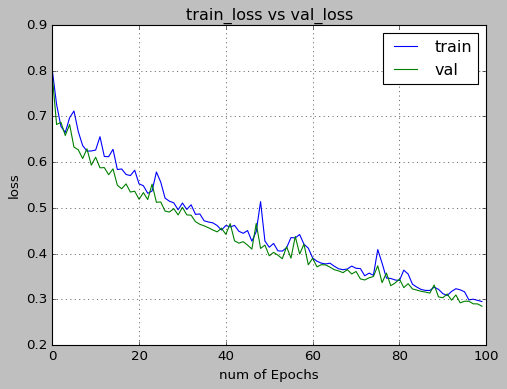

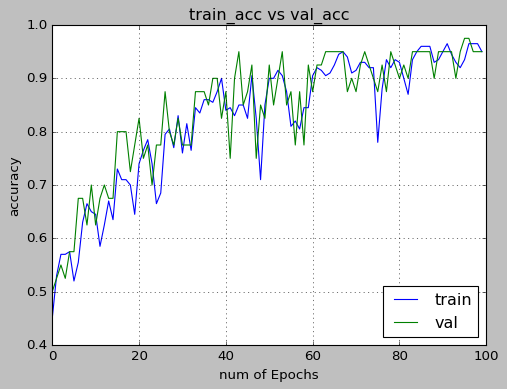

In [22]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('loss_curve_ex-3_norm')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('acc_curve_ex-3_norm')

## Evaluate the performance of the model

In [23]:
score = model.evaluate(test_data_x_flatten, test_data_y)
print (score)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')

40/40 [==============================] - 0s 3ms/step
[0.28481786251068114, 0.94999999999999996]
loss: 0.284817862511
acc:  95.0%


## Predicting the model output on new test data

In [20]:
# Predict output probability
model.predict(test_data_x_flatten[10:30])

array([[ 0.3487457 ],
       [ 0.16409911],
       [ 0.23236446],
       [ 0.22522108],
       [ 0.11545766],
       [ 0.32560518],
       [ 0.22461073],
       [ 0.2777541 ],
       [ 0.10858998],
       [ 0.51842755],
       [ 0.77054405],
       [ 0.63129038],
       [ 0.82792586],
       [ 0.73108029],
       [ 0.72128385],
       [ 0.81119019],
       [ 0.60911953],
       [ 0.64394218],
       [ 0.77343154],
       [ 0.95113277]], dtype=float32)

In [21]:
# predict output class
model.predict_classes(test_data_x_flatten[10:30])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

## predicting from new source

In [33]:
test_img = cv2.imread('cat.7.jpg')
print ('test_img',test_img.shape)
test_img = cv2.resize(test_img,(num_rows,num_cols))
print ('test_img_resized',test_img.shape)
test_img_flatten = test_img.reshape(1, -1)
print ('test_img_flatten',test_img_flatten.shape)
test_img_flatten = test_img_flatten/255

test_img (499, 495, 3)
test_img_resized (32, 32, 3)
test_img_flatten (1, 3072)


In [35]:
model.predict(test_img_flatten)

array([[ 0.16409905]], dtype=float32)

## Saving the model and weights

In [24]:
# serialize model to JSON
model_json = model.to_json()
with open("logistic_reg_model_ex_3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("logistic_reg_model_weights_ex_3.h5")
print("Saved model to disk")

Saved model to disk


## Loading the model and weights

In [25]:
from keras.models import model_from_json
from keras.models import load_model

In [26]:
model_name = "logistic_reg_model_ex_3.json"
weight_name = "logistic_reg_model_weights_ex_3.h5"

json_file = open(model_name, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weight_name)
print("Loaded model from disk")

Loaded model from disk


In [27]:
# Predict output probability
loaded_model.predict(test_data_x_flatten[10:30])

array([[ 0.3487457 ],
       [ 0.16409911],
       [ 0.23236446],
       [ 0.22522108],
       [ 0.11545766],
       [ 0.32560518],
       [ 0.22461073],
       [ 0.2777541 ],
       [ 0.10858998],
       [ 0.51842755],
       [ 0.77054405],
       [ 0.63129038],
       [ 0.82792586],
       [ 0.73108029],
       [ 0.72128385],
       [ 0.81119019],
       [ 0.60911953],
       [ 0.64394218],
       [ 0.77343154],
       [ 0.95113277]], dtype=float32)

In [ ]:
#model.save('model.5')
#loaded_model=load_model('model.h5')